# Pymaceuticals Inc.
---

### Analysis

- In the performed tests we can come to a couple of conclusions:
  - Capomulin and Ramicane seemed to be the most effective treatments out of the 4 samples observed. They saw the lowest tumor volume by their latest to last timepoint. An additional note,
    the other 2 samples observed (Infubinol and Ceftamin) were the most test compared to every drug regimen and didnt see the effectiveness as Ceftamin and Infubinol. 
  - We charted Weight against Tumor Volume and saw that more over weight mice were, they had the most severe case of enlarged tumors. Now effectiveness for treatments based on weight still needs     more research but we can define that overweight mice are more prone to a worse case. We calculated the relation between the two to be 0.88 and saw a positive slope which meant on increase of     weight, tumor size grew.
  - Taking a look at one test subject in the Capomulin Drug Regimen, we saw a major decrease of tumor volume between timepoints 15 and 20, followed by a small increase and later decreasing to a     more minimal size around timepoint 40.
  - Capomulin and Ramicane dealt with a lower average weight of mice.
  - We noticed one outlier in the infubinol treatment. This could have been a trial that was cut short or a minor case of tumor volume.
  - There were on average an even amount of male and female mice.
    
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how="left" )
# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [4]:
# Our data should be uniquely identified by Mouse ID annuniqueimepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


dupes = combined_df.loc[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False), :]
dupes['Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupeMouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
dupeMouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.loc[combined_df["Mouse ID"] != "g989", :]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
drugs = clean_df["Drug Regimen"].unique()
mean_tumor_volume = []
median_tumor_volume = []
tumor_volume_variance = []
tumor_volume_stdev = []
tumor_volume_stderr = []


#-----------------------------------------------------------------------------
drugGroup = clean_df.groupby("Drug Regimen")

mean_tumor_volume = drugGroup.mean(numeric_only=True)["Tumor Volume (mm3)"]
    
median_tumor_volume = drugGroup.median(numeric_only=True)["Tumor Volume (mm3)"]

tumor_volume_variance = drugGroup.var(numeric_only=True)["Tumor Volume (mm3)"]

tumor_volume_stdev = drugGroup.std(numeric_only=True)["Tumor Volume (mm3)"]

tumor_volume_stderr = drugGroup.sem(numeric_only=True)["Tumor Volume (mm3)"]

stats_df = pd.concat([mean_tumor_volume, median_tumor_volume, tumor_volume_variance, tumor_volume_stdev, tumor_volume_stderr], axis=1, keys=["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."])
stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

one_line_stats  = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':["mean", "median", "var", "std", "sem"]})

one_line_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

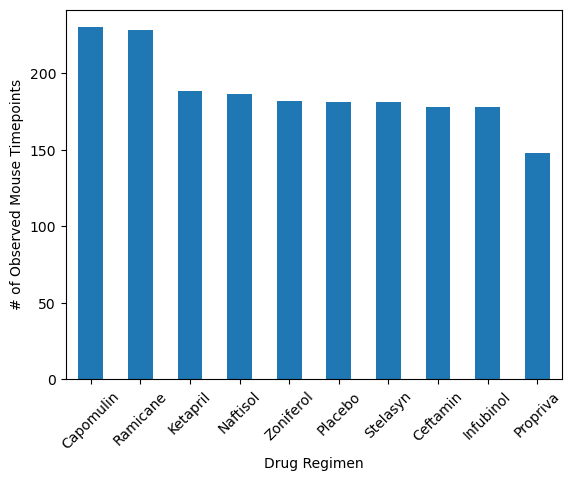

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drugRegimenBar = clean_df.groupby("Drug Regimen").agg({"Timepoint":"count"}).sort_values(by="Timepoint", ascending=False)
drugRegimenBar.plot(kind = 'bar', legend=False, ylabel='# of Observed Mouse Timepoints', rot=45)

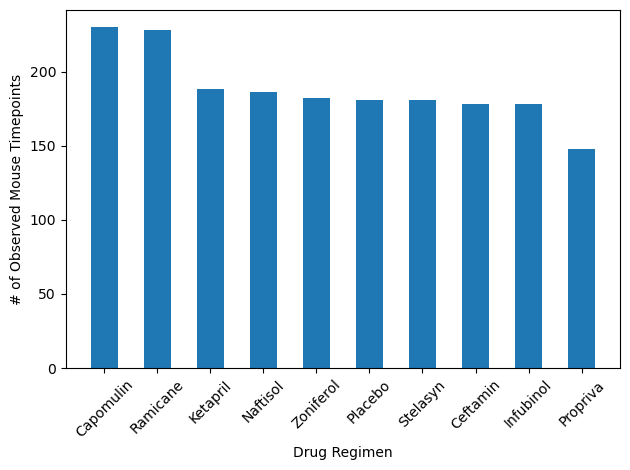

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drugRegimenBar.index, drugRegimenBar["Timepoint"], align="center", width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: ylabel='Sex'>

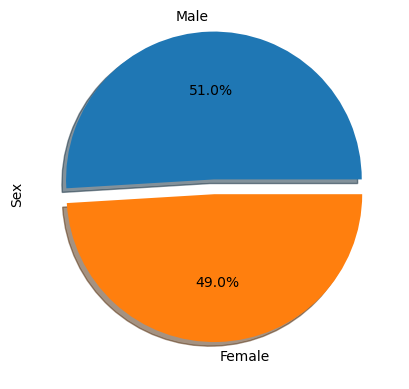

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouseOrientation = clean_df['Sex'].value_counts()

mouseOrientation.plot(kind="pie", autopct="%1.1f%%", shadow=True, explode=[0.1, 0])

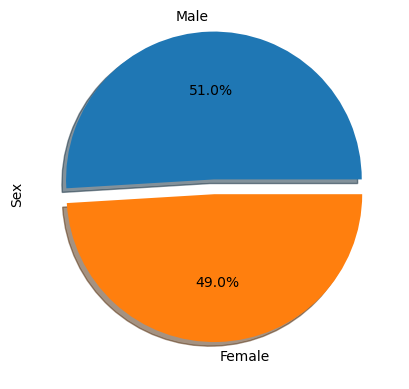

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mouseOrientation, labels=mouseOrientation.index, autopct="%1.1f%%", shadow=True, explode=[0.1, 0])

plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

study_results_greatest = study_results.sort_values("Timepoint", ascending=True)
study_results_greatest = study_results.drop_duplicates(subset='Mouse ID', keep='last')

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# print(study_results_greatest)


mouseGreatest_df = pd.merge(study_results_greatest, mouse_metadata, how='left', on='Mouse ID')
#Filter drug regimens
mouseGreatest_df = mouseGreatest_df.loc[mouseGreatest_df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']), :]

mouseGreatest_df = mouseGreatest_df.reset_index(drop=True)


mouseGreatest_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,u153,0,45.000000,0,Ceftamin,Female,11,25
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,x226,0,45.000000,0,Ceftamin,Male,23,28
3,t573,0,45.000000,0,Ceftamin,Female,15,27
4,c326,5,36.321346,0,Infubinol,Female,18,25
...,...,...,...,...,...,...,...,...
95,a644,45,32.978522,1,Ramicane,Female,7,17
96,i177,45,33.562402,3,Ramicane,Male,10,18
97,r944,45,41.581521,2,Capomulin,Male,12,25
98,u364,45,31.023923,3,Capomulin,Male,18,17


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = list(mouseGreatest_df['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mouseGreatest_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerqCap = quartiles['Capomulin'][0.25]
upperqCap = quartiles['Capomulin'][0.75]
iqrCap = upperqCap-lowerqCap

lower_bound_cap = lowerqCap - (1.5*iqrCap)
upper_bound_cap = upperqCap + (1.5*iqrCap)
    
outlier_occupancy_cap = mouseGreatest_df.loc[((mouseGreatest_df['Tumor Volume (mm3)'] < lower_bound_cap) | (mouseGreatest_df['Tumor Volume (mm3)'] > upper_bound_cap)) & (mouseGreatest_df['Drug Regimen'] == 'Capomulin')]
print(f"Capomulin\'s potential outliers: { outlier_occupancy_cap['Tumor Volume (mm3)'] }")
tumor_vol_data.append(outlier_occupancy_cap['Tumor Volume (mm3)'])

lowerqCeftamin = quartiles['Ceftamin'][0.25]
upperqCeftamin = quartiles['Ceftamin'][0.75]
iqrCeftamin = upperqCeftamin-lowerqCeftamin

lower_bound_ceftamin = lowerqCeftamin - (1.5*iqrCeftamin)
upper_bound_ceftamin = upperqCeftamin + (1.5*iqrCeftamin)
    
outlier_occupancy_ceftamin = mouseGreatest_df.loc[((mouseGreatest_df['Tumor Volume (mm3)'] < lower_bound_ceftamin) | (mouseGreatest_df['Tumor Volume (mm3)'] > upper_bound_ceftamin)) & (mouseGreatest_df['Drug Regimen'] == 'Ceftamin')]
print(f"Ceftamin\'s potential outliers: { outlier_occupancy_ceftamin['Tumor Volume (mm3)'] }")
tumor_vol_data.append(outlier_occupancy_ceftamin['Tumor Volume (mm3)'])

lowerqInfubinol = quartiles['Infubinol'][0.25]
upperqInfubinol = quartiles['Infubinol'][0.75]
iqrInfubinol = upperqInfubinol-lowerqInfubinol

lower_bound_Infubinol = lowerqInfubinol - (1.5*iqrInfubinol)
upper_bound_Infubinol = upperqInfubinol + (1.5*iqrInfubinol)
    
outlier_occupancy_Infubinol = mouseGreatest_df.loc[((mouseGreatest_df['Tumor Volume (mm3)'] < lower_bound_Infubinol) | (mouseGreatest_df['Tumor Volume (mm3)'] > upper_bound_Infubinol)) & (mouseGreatest_df['Drug Regimen'] == 'Infubinol')]
print(f"Infubinol\'s potential outliers: { outlier_occupancy_Infubinol['Tumor Volume (mm3)'] }")
tumor_vol_data.append(outlier_occupancy_Infubinol['Tumor Volume (mm3)'])

lowerqRamicane = quartiles['Ramicane'][0.25]
upperqRamicane = quartiles['Ramicane'][0.75]
iqrRamicane = upperqRamicane-lowerqRamicane

lower_bound_Ramicane = lowerqRamicane - (1.5*iqrRamicane)
upper_bound_Ramicane = upperqRamicane + (1.5*iqrRamicane)
    
outlier_occupancy_Ramicane = mouseGreatest_df.loc[((mouseGreatest_df['Tumor Volume (mm3)'] < lower_bound_Ramicane) | (mouseGreatest_df['Tumor Volume (mm3)'] > upper_bound_Ramicane)) & (mouseGreatest_df['Drug Regimen'] == 'Ramicane')]
print(f"Ramicane\'s potential outliers: { outlier_occupancy_Ramicane['Tumor Volume (mm3)'] }")
tumor_vol_data.append(outlier_occupancy_Ramicane['Tumor Volume (mm3)'])

outlier_occupancy_Infubinol

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 4    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
4,c326,5,36.321346,0,Infubinol,Female,18,25


{'whiskers': [<matplotlib.lines.Line2D at 0x2130bea8df0>,
 'caps': [<matplotlib.lines.Line2D at 0x2130beabd60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2130bea86d0>,
 'medians': [<matplotlib.lines.Line2D at 0x2130beaa920>,
 'fliers': [<matplotlib.lines.Line2D at 0x2130beab430>,
 'means': []}

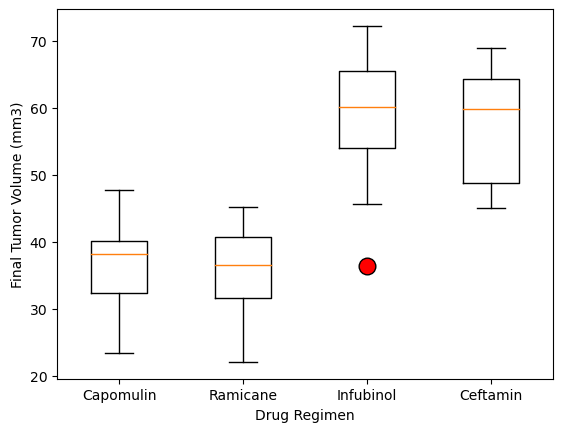

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
capomulin_df = mouseGreatest_df.loc[mouseGreatest_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = mouseGreatest_df.loc[mouseGreatest_df["Drug Regimen"] == "Ramicane", :]
infubinol_df = mouseGreatest_df.loc[mouseGreatest_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df = mouseGreatest_df.loc[mouseGreatest_df["Drug Regimen"] == "Ceftamin", :]
fig, ax1 = plt.subplots()
treatments.reverse()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

#Citation: https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib
#Wanted to match solution outlier color and learn customization for boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none')



ax1.boxplot([capomulin_df['Tumor Volume (mm3)'], ramicane_df['Tumor Volume (mm3)'], infubinol_df['Tumor Volume (mm3)'], ceftamin_df['Tumor Volume (mm3)']], labels=treatments, flierprops=flierprops)


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

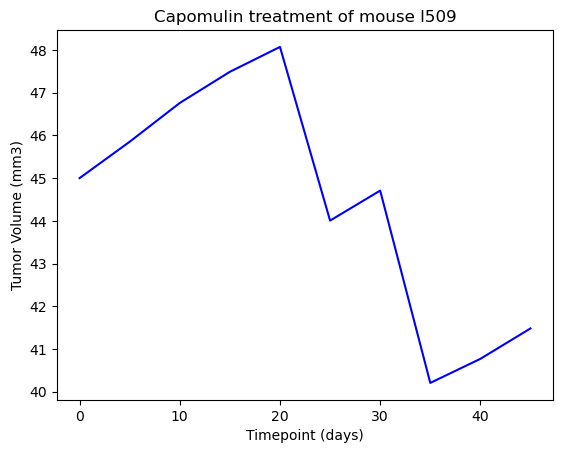

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin




#Distinguished l509 for using capomulin so we are charting this one.
oneMouse = clean_df.loc[clean_df['Mouse ID'] == 'l509']
plt.plot(oneMouse['Timepoint'], oneMouse['Tumor Volume (mm3)'], color='blue')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509')

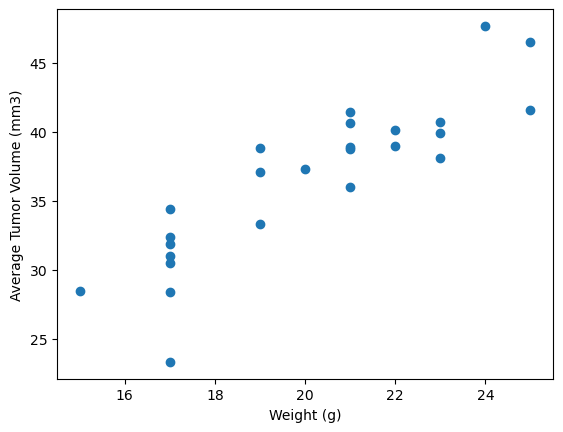

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.88


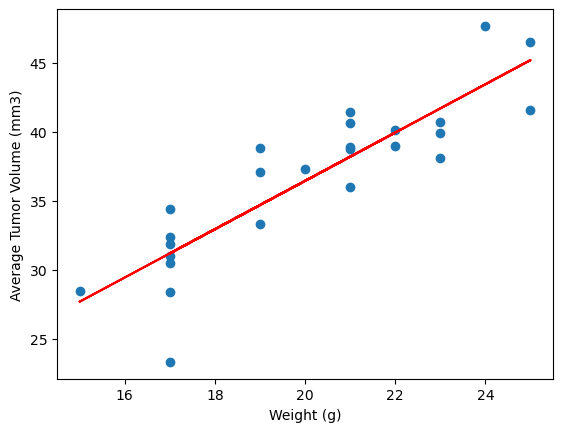

In [145]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])

#y = mx + b
mouse_fit = slope * capomulin_df['Weight (g)'] + intercept

print(f'The correlation between mouse weight and the average tumor volume is {rvalue:.02f}')
plt.scatter(capomulin_df['Weight (g)'], capomulin_df['Tumor Volume (mm3)'])
plt.plot(capomulin_df['Weight (g)'],mouse_fit,"-", color = 'red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [163]:
mouseGreatest_df.groupby('Drug Regimen')['Weight (g)'].mean()

Drug Regimen
Capomulin    20.12
Ceftamin     27.40
Infubinol    27.32
Ramicane     20.00
Name: Weight (g), dtype: float64